In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.metrics import classification_report

In [6]:
df=pd.read_csv('bank.csv')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [8]:
df.shape

(11162, 17)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

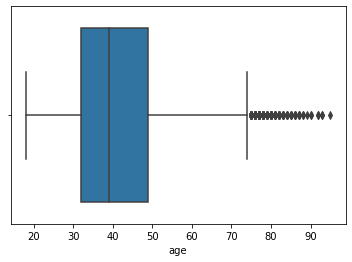

age
-----------------------------------------------


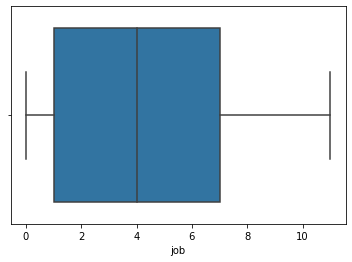

job
-----------------------------------------------


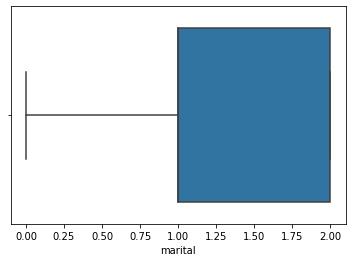

marital
-----------------------------------------------


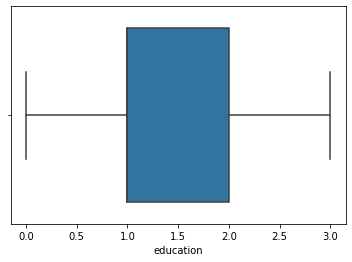

education
-----------------------------------------------


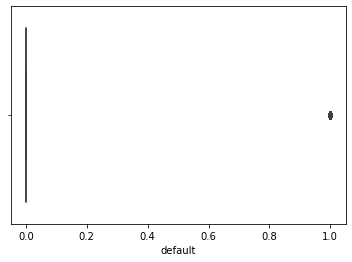

default
-----------------------------------------------


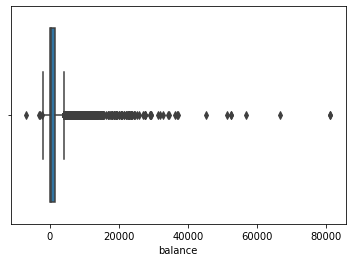

balance
-----------------------------------------------


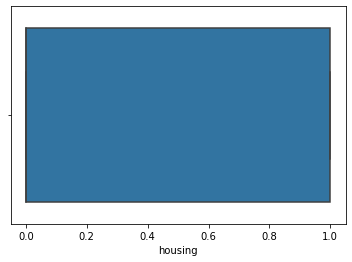

housing
-----------------------------------------------


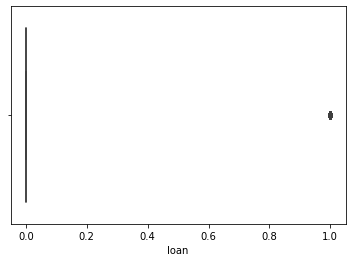

loan
-----------------------------------------------


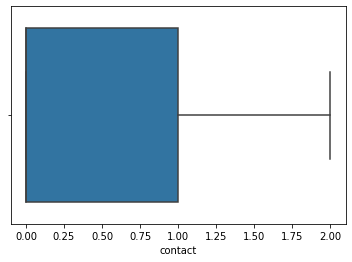

contact
-----------------------------------------------


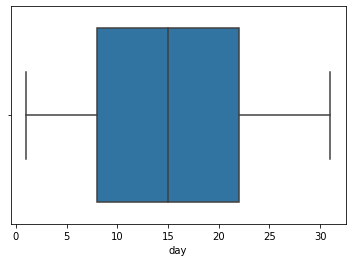

day
-----------------------------------------------


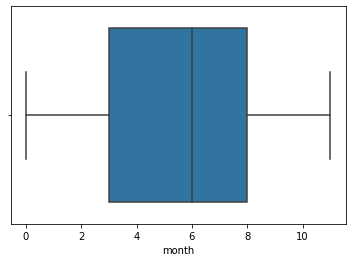

month
-----------------------------------------------


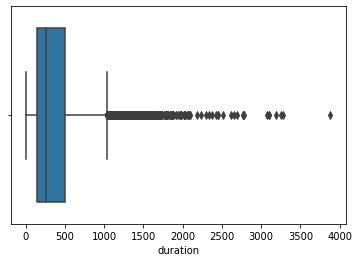

duration
-----------------------------------------------


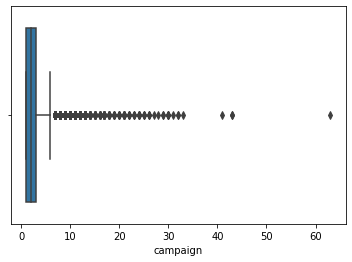

campaign
-----------------------------------------------


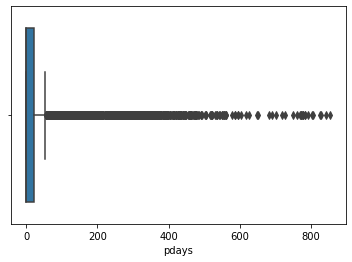

pdays
-----------------------------------------------


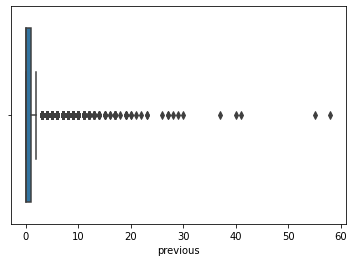

previous
-----------------------------------------------


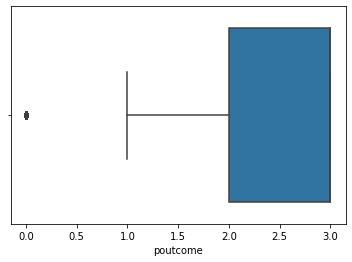

poutcome
-----------------------------------------------


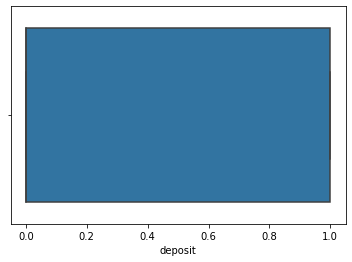

deposit
-----------------------------------------------


In [12]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()
    
    print(col)
    print("-----------------------------------------------")

In [13]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [14]:
s=df['age']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [15]:
len(outliers)

171

In [16]:
a=list(outliers.keys())
df.drop(a,inplace=True)

In [17]:
s=df['balance']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [18]:
len(outliers1)

1037

In [19]:
b=list(outliers1.keys())
df.drop(b,inplace=True)

In [20]:
s=df['duration']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [21]:
len(outliers2)

581

In [22]:
c=list(outliers2.keys())
df.drop(c,inplace=True)

In [23]:
X=df.drop('deposit',axis=1)
Y=df['deposit']

In [24]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,3
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,3
10,38,0,2,1,0,100,1,0,2,7,8,786,1,-1,0,3


In [25]:
Y.head()

3     1
4     1
5     1
8     1
10    1
Name: deposit, dtype: int64

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [27]:
ss=StandardScaler()

In [28]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [29]:
def create_model(model):
    model.fit(X_train_ss,Y_train)
    Y_pred=model.predict(X_test_ss)
    print(classification_report(Y_test,Y_pred))

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()

In [32]:
create_model(lr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1603
           1       0.77      0.73      0.75      1209

    accuracy                           0.79      2812
   macro avg       0.79      0.78      0.79      2812
weighted avg       0.79      0.79      0.79      2812



In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt=DecisionTreeClassifier()

In [35]:
create_model(dt)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1603
           1       0.74      0.75      0.74      1209

    accuracy                           0.78      2812
   macro avg       0.77      0.77      0.77      2812
weighted avg       0.78      0.78      0.78      2812



In [36]:
from sklearn.svm import LinearSVC

In [37]:
svc1=LinearSVC(random_state=1)
svc2=LinearSVC(random_state=1,C=0.5)

In [38]:
create_model(svc1)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1603
           1       0.77      0.73      0.75      1209

    accuracy                           0.79      2812
   macro avg       0.79      0.78      0.78      2812
weighted avg       0.79      0.79      0.79      2812



In [39]:
create_model(svc2)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1603
           1       0.77      0.73      0.75      1209

    accuracy                           0.79      2812
   macro avg       0.79      0.78      0.78      2812
weighted avg       0.79      0.79      0.79      2812



In [40]:
from sklearn.svm import SVC

In [41]:
svc3=SVC(kernel='rbf')
svc4=SVC(kernel='poly')

In [42]:
create_model(svc3)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1603
           1       0.78      0.80      0.79      1209

    accuracy                           0.82      2812
   macro avg       0.81      0.81      0.81      2812
weighted avg       0.82      0.82      0.82      2812



In [43]:
create_model(svc4)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1603
           1       0.77      0.75      0.76      1209

    accuracy                           0.80      2812
   macro avg       0.79      0.79      0.79      2812
weighted avg       0.80      0.80      0.80      2812



In [44]:
from sklearn.naive_bayes import BernoulliNB
be=BernoulliNB()

In [45]:
create_model(be)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1603
           1       0.67      0.61      0.64      1209

    accuracy                           0.70      2812
   macro avg       0.70      0.69      0.69      2812
weighted avg       0.70      0.70      0.70      2812



In [46]:
import math
math.sqrt(len(Y_test))

53.028294334251406

In [47]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=54)

In [48]:
create_model(cls)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1603
           1       0.79      0.70      0.74      1209

    accuracy                           0.79      2812
   macro avg       0.79      0.78      0.78      2812
weighted avg       0.79      0.79      0.79      2812



In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bc1=BaggingClassifier(LogisticRegression(),random_state=1)
bc2=BaggingClassifier(LogisticRegression(),random_state=1,bootstrap=False)

In [51]:
create_model(bc1)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1603
           1       0.77      0.73      0.75      1209

    accuracy                           0.79      2812
   macro avg       0.79      0.78      0.79      2812
weighted avg       0.79      0.79      0.79      2812



In [52]:
create_model(bc2)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1603
           1       0.77      0.73      0.75      1209

    accuracy                           0.79      2812
   macro avg       0.79      0.78      0.79      2812
weighted avg       0.79      0.79      0.79      2812



In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc=RandomForestClassifier(random_state=1)

In [55]:
create_model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1603
           1       0.80      0.85      0.82      1209

    accuracy                           0.84      2812
   macro avg       0.84      0.84      0.84      2812
weighted avg       0.84      0.84      0.84      2812



In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgc=XGBClassifier()

In [58]:
create_model(ada)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1603
           1       0.80      0.79      0.79      1209

    accuracy                           0.82      2812
   macro avg       0.82      0.82      0.82      2812
weighted avg       0.82      0.82      0.82      2812



In [59]:
create_model(gbc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1603
           1       0.81      0.84      0.82      1209

    accuracy                           0.85      2812
   macro avg       0.84      0.85      0.84      2812
weighted avg       0.85      0.85      0.85      2812



In [60]:
create_model(xgc)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1603
           1       0.80      0.86      0.83      1209

    accuracy                           0.85      2812
   macro avg       0.84      0.85      0.85      2812
weighted avg       0.85      0.85      0.85      2812



In [61]:
from mlxtend.classifier import StackingClassifier

In [62]:
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
rfc=RandomForestClassifier(random_state=1)
model_list=[gbc,ada,rfc]
meta=XGBClassifier()

In [63]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [64]:
create_model(sc)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1603
           1       0.80      0.85      0.82      1209

    accuracy                           0.84      2812
   macro avg       0.84      0.84      0.84      2812
weighted avg       0.84      0.84      0.84      2812



In [65]:
from sklearn.ensemble import VotingClassifier

In [66]:
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
rfc=RandomForestClassifier(random_state=1)
model_list=[("gbc",gbc),("ada",ada),("rfc",rfc)]

In [67]:
vc1=VotingClassifier(estimators=model_list)
vc2=VotingClassifier(estimators=model_list,voting="soft")

In [68]:
create_model(vc1)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1603
           1       0.81      0.84      0.82      1209

    accuracy                           0.84      2812
   macro avg       0.84      0.84      0.84      2812
weighted avg       0.85      0.84      0.84      2812



In [69]:
create_model(vc2)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1603
           1       0.80      0.86      0.83      1209

    accuracy                           0.85      2812
   macro avg       0.84      0.85      0.84      2812
weighted avg       0.85      0.85      0.85      2812

